# Performance Enhancing Drugs Role in Home Run Hits

# Introduction

# Documenting Performance Enhancing Drugs' Role in Major League Baseball

"During the 1990s, Major League Baseball experienced an increase in offensive output that resulted in some unprecedented home run totals for the power hitters of the decade. While just three players reached the 50-home run mark in any season between 1961 and 1994, many sluggers would start to surpass that number in the mid-90s.

In 1996, Mark McGwire of the Oakland Athletics led the majors with 52 home runs despite missing part of the season. In 1997, both McGwire and the Seattle Mariners' Ken Griffey Jr. threatened the individual record of 61 -- set by Roger Maris in 1961 -- before ending the season with 58 and 56 home runs, respectively.

Midway through the 1997 season, McGwire was traded to the St. Louis Cardinals. The move set the stage for a memorable season when he and Sammy Sosa of the Chicago Cubs battled for the National League home run title, during a year in which 13 different major leaguers hit at least 40 home runs.

Late in the season, it seemed inevitable that both Sosa and McGwire would break Maris' 37-year-old record, and it was just a matter of who would get there first. In a series in early September against Sosa and the Cubs, McGwire hit his 61st and 62nd home runs of the season to surpass Maris' number. By the final week of the season, Sosa had battled back to draw even with McGwire at 65 home runs. McGwire went on to finish with five home runs in his team's final series to reach 70 for the season. Sosa finished second in the NL in home runs with 66, 26 more than his previous season high. He was named National League MVP.

The home run onslaught captured the attention of the country and helped to reclaim popularity for the league four years after a strike had shortened the 1994 season. In 1998, McGwire and Sosa shared the "Sportsman of the Year" honor from Sports Illustrated.

During the 1998 home run chase, McGwire had admitted to using androstenedione, a substance that was banned by the National Football League and the NCAA. Androstenedione was not illegal at that time in Major League Baseball, however, which had yet to institute a testing program for many substances.

McGwire's record stood for only three years, as Barry Bonds of the San Francisco Giants hit 73 home runs to top the majors in 2001. Bonds notched 73 homers despite failing to reach the 50-home run plateau in any prior season. He also hit his 500th career home run that season, and reached the 600 HR mark just a season later.

The home run heroics of the 1998 and 2001 seasons were called into question as McGwire, Sosa and Bonds were among a group of major leaguers linked to the use of PEDs in the following years.

The 500 home run club remains one of baseball's most prestigious groups, though the increased offensive totals of the 1990s and 2000s have taken some luster off membership. In 1996, Eddie Murray became the 15th member of the 500 home run club, and the first since Mike Schmidt in 1987. But it wouldn't be long until Murray had company. Between 1998 and 2009, 10 more players reached 500 career home runs, easily the largest increase in membership in baseball history. Of the 10 players, six -- Barry Bonds, Alex Rodriguez, Mark McGwire, Manny Ramirez, Rafael Palmeiro and Gary Sheffield -- have been linked to PEDs."
(Excerpt taken from http://www.espn.com/mlb/topics/_/page/the-steroids-era)

# Hypothesis



The purpose of this request for comment is to propose an A/B test the hypothesis that performance enhancing drugs led to better offensive numbers than those not taking it. The proposal is organized as follows:

        -Overview of the data 
        -Motivation for the test
        -Rollout plan
        -Evaluation plan
# Overview of the data
The data examined in this report come from a set of the Lahman Baseball Statistics Database, reports generated by Lahman. The capstone contains statistics such as: (i) batting statistics for all players, (ii) league awardees, recognized for their offensive, defensive prowess in addition to their overall addition to their respective team and (iii) salaries for these players. Below, we will get a sense for the structure of these files, and run some preliminary descriptive analyses.
In order to create symetry we will analaze a sample of 40 years; 18 years before PEDs were deemed against league rules (1973-1991) and 18 years after (1992 -2009).


In [59]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import time
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [66]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
Steriods = pd.read_csv('/Users/ezzan/Downloads/python_drills/steriodslist.csv')

In [84]:
b1 = Batting[Batting['yearID'].between(1973, 1991)]
b2 = Batting[Batting['yearID'].between(1992, 2009)]
s1 = Salary[Salary['yearID'].between(1973, 1991)]
s2 = Salary[Salary['yearID'].between(1992, 2009)]
a1 = Award[Award['yearID'].between(1973, 1991)]
a2 = Award[Award['yearID'].between(1992, 2009)]
t1 = Team[Team['yearID'].between(1992, 2009)]
t2 = Team[Team['yearID'].between(1992, 2009)]

In [89]:


topHR1 = b1.sort_values('HR',ascending=False)
topHR2 = b2.sort_values('HR',ascending=False)


# Top 100 Hr leaders per year (1971-1991)
TOPHR1 = topHR1[["playerID", "HR", "RBI", "yearID"]].head(100)


Top 100 HR leaders per year (1992-2009)

In [90]:

TOPHR2 =topHR2[["playerID", "HR", "RBI", "yearID"]].head(100)
COMBINED= TOPHR1+ TOPHR2

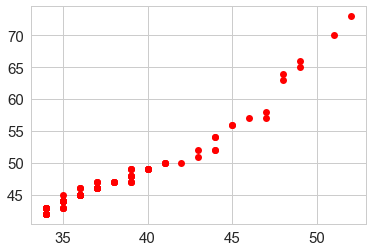

In [91]:

plt.plot(TOPHR1['HR'], TOPHR2['HR'], 'ro')
plt.show()

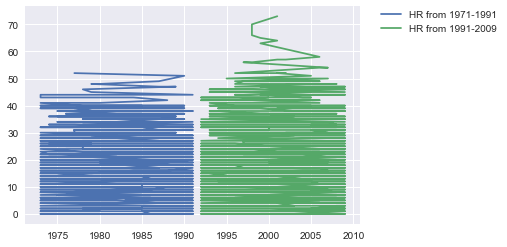

In [98]:
plt.plot(topHR1['yearID'], topHR1['HR'], label= "HR from 1971-1991")
plt.plot(topHR2['yearID'], topHR2['HR'], label= "HR from 1991-2009")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
plt.plot(p6['avg.'], p4['team_batavg'], 'ro')
plt.show()

In [74]:
Steriods['Player'] =Steriods['Player'].str.lower()
name = Steriods['Player']
name_split = name.str.split(' ', expand=True)
first = name_split[0]
last = name_split[1]
firstname = last[0:5]
lastname = first[0:1]
newnames = [firstname + lastname +'01']
print(newnames)

[0    allenchad01
1            NaN
2            NaN
3            NaN
4            NaN
dtype: object]
